# Feature Engineering and Data exploration

## Notes:
## there are many types to win or lose. After abstracting this away to only have a binary win or loss

In [1]:
import pandas as pd

data = pd.read_csv('club_games_data.csv')

data

,white_username,black_username,white_id,black_id,white_rating,black_rating,white_result,black_result,time_class,time_control,rules,rated,fen,pgn
0,-Amos-,miniman2804,https://api.chess.com/pub/player/-amos-,https://api.chess.com/pub/player/miniman2804,1708,1608,win,checkmated,daily,1/259200,chess,True,r2r4/p2p1p1p/b6R/n1p1kp2/2P2P2/3BP3/PP5P/4K2R ...,"[Event ""Enjoyable games 2 - Round 1""]\n[Site ""..."
1,-Amos-,koltcho69,https://api.chess.com/pub/player/-amos-,https://api.chess.com/pub/player/koltcho69,1726,1577,win,resigned,daily,1/172800,chess,True,8/5Q1k/4n1pp/8/7P/2N2b2/PP3P2/5K2 b - - 1 33,"[Event ""Rapid Rats - Board 5""]\n[Site ""Chess.c..."
2,-Amos-,enhmandah,https://api.chess.com/pub/player/-amos-,https://api.chess.com/pub/player/enhmandah,1727,842,win,resigned,daily,1/172800,chess,True,rn1q1b1r/kb2p1pp/2p5/p1Q5/N1BP2n1/4PN2/1P3PPP/...,"[Event ""CHESS BOARD CLASH - Round 1""]\n[Site ""..."
3,enhmandah,-Amos-,https://api.chess.com/pub/player/enhmandah,https://api.chess.com/pub/player/-amos-,819,1727,checkmated,win,daily,1/172800,chess,True,r3kb1r/pp3ppp/3p1n2/2pKp3/P3P3/1P6/4qP1P/QNB5 ...,"[Event ""CHESS BOARD CLASH - Round 1""]\n[Site ""..."
4,-Amos-,Shalllow-Blue,https://api.chess.com/pub/player/-amos-,https://api.chess.com/pub/player/shalllow-blue,1729,1116,win,resigned,daily,1/172800,chess,True,r3b2r/pp6/2pPpR1k/4n3/2P3Q1/3B4/PP4PP/R5K1 b -...,"[Event ""CHESS BOARD CLASH - Round 1""]\n[Site ""..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66874,Alyushkov,abdullahnasib,https://api.chess.com/pub/player/alyushkov,https://api.chess.com/pub/player/abdullahnasib,866,901,resigned,win,blitz,300,chess,True,1k1q1bnr/p1pb2pp/Bp2p3/3pPp2/3P4/N1P2N2/1P3PPP...,"[Event ""Live Chess""]\n[Site ""Chess.com""]\n[Dat..."
66875,abdullahnasib,Nizaamulmulk,https://api.chess.com/pub/player/abdullahnasib,https://api.chess.com/pub/player/nizaamulmulk,910,912,win,timeout,blitz,300,chess,True,8/p7/k1p5/1pP4p/1K1P4/1PN1Q3/1r3n1q/8 b - -,"[Event ""Live Chess""]\n[Site ""Chess.com""]\n[Dat..."
66876,esadot,abdullahnasib,https://api.chess.com/pub/player/esadot,https://api.chess.com/pub/player/abdullahnasib,909,919,abandoned,win,blitz,300,chess,True,3r1rk1/5p2/1PRp2p1/2nNp2p/4P3/3P2PR/3b2K1/8 w - -,"[Event ""Live Chess""]\n[Site ""Chess.com""]\n[Dat..."
66877,abdullahnasib,FrancescoPops,https://api.chess.com/pub/player/abdullahnasib,https://api.chess.com/pub/player/francescopops,928,933,win,resigned,blitz,300,chess,True,r3kb1r/pp1q1p2/2npbN1p/2p1p1p1/2P1P3/3P2PN/PP3...,"[Event ""Live Chess""]\n[Site ""Chess.com""]\n[Dat..."


In [2]:
data.columns
data['pgn']

0        [Event "Enjoyable games 2 - Round 1"]\n[Site "...
1        [Event "Rapid Rats - Board 5"]\n[Site "Chess.c...
2        [Event "CHESS BOARD CLASH - Round 1"]\n[Site "...
3        [Event "CHESS BOARD CLASH - Round 1"]\n[Site "...
4        [Event "CHESS BOARD CLASH - Round 1"]\n[Site "...
                               ...                        
66874    [Event "Live Chess"]\n[Site "Chess.com"]\n[Dat...
66875    [Event "Live Chess"]\n[Site "Chess.com"]\n[Dat...
66876    [Event "Live Chess"]\n[Site "Chess.com"]\n[Dat...
66877    [Event "Live Chess"]\n[Site "Chess.com"]\n[Dat...
66878    [Event "Live Chess"]\n[Site "Chess.com"]\n[Dat...
Name: pgn, Length: 66879, dtype: object

In [3]:
#text = str(data['pgn'])
pattern = '[ECOUrl "https://www.chess.com/openings/'

list_openings = []
for i in list(data['pgn']):
    i = i.split('\n')
    for j in i:
        if pattern in j:
            list_openings.append(j.removeprefix('[ECOUrl "https://www.chess.com/openings/'))

list_openings
len(list_openings)

66332

In [4]:
data['opening_used'] = list_openings + ["no data"] * (len(data) - len(list_openings))
data.head()

,white_username,black_username,white_id,black_id,white_rating,black_rating,white_result,black_result,time_class,time_control,rules,rated,fen,pgn,opening_used
0,-Amos-,miniman2804,https://api.chess.com/pub/player/-amos-,https://api.chess.com/pub/player/miniman2804,1708,1608,win,checkmated,daily,1/259200,chess,True,r2r4/p2p1p1p/b6R/n1p1kp2/2P2P2/3BP3/PP5P/4K2R ...,"[Event ""Enjoyable games 2 - Round 1""]\n[Site ""...","Nimzo-Indian-Defense-Spielmann-Variation""]"
1,-Amos-,koltcho69,https://api.chess.com/pub/player/-amos-,https://api.chess.com/pub/player/koltcho69,1726,1577,win,resigned,daily,1/172800,chess,True,8/5Q1k/4n1pp/8/7P/2N2b2/PP3P2/5K2 b - - 1 33,"[Event ""Rapid Rats - Board 5""]\n[Site ""Chess.c...","Giuoco-Piano-Game-Main-Line""]"
2,-Amos-,enhmandah,https://api.chess.com/pub/player/-amos-,https://api.chess.com/pub/player/enhmandah,1727,842,win,resigned,daily,1/172800,chess,True,rn1q1b1r/kb2p1pp/2p5/p1Q5/N1BP2n1/4PN2/1P3PPP/...,"[Event ""CHESS BOARD CLASH - Round 1""]\n[Site ""...","Queens-Pawn-Opening-1...d5-2.e3""]"
3,enhmandah,-Amos-,https://api.chess.com/pub/player/enhmandah,https://api.chess.com/pub/player/-amos-,819,1727,checkmated,win,daily,1/172800,chess,True,r3kb1r/pp3ppp/3p1n2/2pKp3/P3P3/1P6/4qP1P/QNB5 ...,"[Event ""CHESS BOARD CLASH - Round 1""]\n[Site ""...","Sicilian-Defense-Snyder-Variation""]"
4,-Amos-,Shalllow-Blue,https://api.chess.com/pub/player/-amos-,https://api.chess.com/pub/player/shalllow-blue,1729,1116,win,resigned,daily,1/172800,chess,True,r3b2r/pp6/2pPpR1k/4n3/2P3Q1/3B4/PP4PP/R5K1 b -...,"[Event ""CHESS BOARD CLASH - Round 1""]\n[Site ""...","Queens-Pawn-Opening-Horwitz-Defense-2.c4""]"


In [5]:
white_game_results = []
black_game_results = []

for i in data['white_result']:
   
    if i != 'win':
        white_game_results.append('loss')
    else:
        white_game_results.append('win')

for i in data['black_result']:
    if i == 'win':
        black_game_results.append('win')
    else:
        black_game_results.append('loss')

data['white_win_or_loss'] = white_game_results
data['black_win_or_loss'] = black_game_results

data

,white_username,black_username,white_id,black_id,white_rating,black_rating,white_result,black_result,time_class,time_control,rules,rated,fen,pgn,opening_used,white_win_or_loss,black_win_or_loss
0,-Amos-,miniman2804,https://api.chess.com/pub/player/-amos-,https://api.chess.com/pub/player/miniman2804,1708,1608,win,checkmated,daily,1/259200,chess,True,r2r4/p2p1p1p/b6R/n1p1kp2/2P2P2/3BP3/PP5P/4K2R ...,"[Event ""Enjoyable games 2 - Round 1""]\n[Site ""...","Nimzo-Indian-Defense-Spielmann-Variation""]",win,loss
1,-Amos-,koltcho69,https://api.chess.com/pub/player/-amos-,https://api.chess.com/pub/player/koltcho69,1726,1577,win,resigned,daily,1/172800,chess,True,8/5Q1k/4n1pp/8/7P/2N2b2/PP3P2/5K2 b - - 1 33,"[Event ""Rapid Rats - Board 5""]\n[Site ""Chess.c...","Giuoco-Piano-Game-Main-Line""]",win,loss
2,-Amos-,enhmandah,https://api.chess.com/pub/player/-amos-,https://api.chess.com/pub/player/enhmandah,1727,842,win,resigned,daily,1/172800,chess,True,rn1q1b1r/kb2p1pp/2p5/p1Q5/N1BP2n1/4PN2/1P3PPP/...,"[Event ""CHESS BOARD CLASH - Round 1""]\n[Site ""...","Queens-Pawn-Opening-1...d5-2.e3""]",win,loss
3,enhmandah,-Amos-,https://api.chess.com/pub/player/enhmandah,https://api.chess.com/pub/player/-amos-,819,1727,checkmated,win,daily,1/172800,chess,True,r3kb1r/pp3ppp/3p1n2/2pKp3/P3P3/1P6/4qP1P/QNB5 ...,"[Event ""CHESS BOARD CLASH - Round 1""]\n[Site ""...","Sicilian-Defense-Snyder-Variation""]",loss,win
4,-Amos-,Shalllow-Blue,https://api.chess.com/pub/player/-amos-,https://api.chess.com/pub/player/shalllow-blue,1729,1116,win,resigned,daily,1/172800,chess,True,r3b2r/pp6/2pPpR1k/4n3/2P3Q1/3B4/PP4PP/R5K1 b -...,"[Event ""CHESS BOARD CLASH - Round 1""]\n[Site ""...","Queens-Pawn-Opening-Horwitz-Defense-2.c4""]",win,loss
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66874,Alyushkov,abdullahnasib,https://api.chess.com/pub/player/alyushkov,https://api.chess.com/pub/player/abdullahnasib,866,901,resigned,win,blitz,300,chess,True,1k1q1bnr/p1pb2pp/Bp2p3/3pPp2/3P4/N1P2N2/1P3PPP...,"[Event ""Live Chess""]\n[Site ""Chess.com""]\n[Dat...",no data,loss,win
66875,abdullahnasib,Nizaamulmulk,https://api.chess.com/pub/player/abdullahnasib,https://api.chess.com/pub/player/nizaamulmulk,910,912,win,timeout,blitz,300,chess,True,8/p7/k1p5/1pP4p/1K1P4/1PN1Q3/1r3n1q/8 b - -,"[Event ""Live Chess""]\n[Site ""Chess.com""]\n[Dat...",no data,win,loss
66876,esadot,abdullahnasib,https://api.chess.com/pub/player/esadot,https://api.chess.com/pub/player/abdullahnasib,909,919,abandoned,win,blitz,300,chess,True,3r1rk1/5p2/1PRp2p1/2nNp2p/4P3/3P2PR/3b2K1/8 w - -,"[Event ""Live Chess""]\n[Site ""Chess.com""]\n[Dat...",no data,loss,win
66877,abdullahnasib,FrancescoPops,https://api.chess.com/pub/player/abdullahnasib,https://api.chess.com/pub/player/francescopops,928,933,win,resigned,blitz,300,chess,True,r3kb1r/pp1q1p2/2npbN1p/2p1p1p1/2P1P3/3P2PN/PP3...,"[Event ""Live Chess""]\n[Site ""Chess.com""]\n[Dat...",no data,win,loss


# Machine Learning Algorithms

In [6]:
# code from Tensorflow text classification tutorial: 
# https://www.tensorflow.org/text/tutorials/text_classification_rnn

import numpy as np

import tensorflow_datasets as tfds
import tensorflow as tf

tfds.disable_progress_bar()

2026-01-06 14:53:01.400745: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/opt/miniconda3/envs/ml_env/lib/python3.12/site-packages/keras/src/export/tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


In [20]:
import matplotlib.pyplot as plt


def plot_graphs_multiple_epochs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])

def plot_graphs(history, metric):
  train = history.history.get(metric, [])
  val = history.history.get('val_'+metric, [])
  epochs = range(1, len(train)+1)
  plt.plot(epochs, train, marker='o')
  if val:
    plt.plot(epochs, val, marker='o')
    plt.xticks(epochs)
    plt.xlabel('Epochs')
    plt.ylabel(metric)
    plt.legend([metric, 'val_'+metric])
    plt.show()

In [8]:
from sklearn.model_selection import train_test_split


In [9]:
len(data['white_win_or_loss'])

66879

In [10]:
data

,white_username,black_username,white_id,black_id,white_rating,black_rating,white_result,black_result,time_class,time_control,rules,rated,fen,pgn,opening_used,white_win_or_loss,black_win_or_loss
0,-Amos-,miniman2804,https://api.chess.com/pub/player/-amos-,https://api.chess.com/pub/player/miniman2804,1708,1608,win,checkmated,daily,1/259200,chess,True,r2r4/p2p1p1p/b6R/n1p1kp2/2P2P2/3BP3/PP5P/4K2R ...,"[Event ""Enjoyable games 2 - Round 1""]\n[Site ""...","Nimzo-Indian-Defense-Spielmann-Variation""]",win,loss
1,-Amos-,koltcho69,https://api.chess.com/pub/player/-amos-,https://api.chess.com/pub/player/koltcho69,1726,1577,win,resigned,daily,1/172800,chess,True,8/5Q1k/4n1pp/8/7P/2N2b2/PP3P2/5K2 b - - 1 33,"[Event ""Rapid Rats - Board 5""]\n[Site ""Chess.c...","Giuoco-Piano-Game-Main-Line""]",win,loss
2,-Amos-,enhmandah,https://api.chess.com/pub/player/-amos-,https://api.chess.com/pub/player/enhmandah,1727,842,win,resigned,daily,1/172800,chess,True,rn1q1b1r/kb2p1pp/2p5/p1Q5/N1BP2n1/4PN2/1P3PPP/...,"[Event ""CHESS BOARD CLASH - Round 1""]\n[Site ""...","Queens-Pawn-Opening-1...d5-2.e3""]",win,loss
3,enhmandah,-Amos-,https://api.chess.com/pub/player/enhmandah,https://api.chess.com/pub/player/-amos-,819,1727,checkmated,win,daily,1/172800,chess,True,r3kb1r/pp3ppp/3p1n2/2pKp3/P3P3/1P6/4qP1P/QNB5 ...,"[Event ""CHESS BOARD CLASH - Round 1""]\n[Site ""...","Sicilian-Defense-Snyder-Variation""]",loss,win
4,-Amos-,Shalllow-Blue,https://api.chess.com/pub/player/-amos-,https://api.chess.com/pub/player/shalllow-blue,1729,1116,win,resigned,daily,1/172800,chess,True,r3b2r/pp6/2pPpR1k/4n3/2P3Q1/3B4/PP4PP/R5K1 b -...,"[Event ""CHESS BOARD CLASH - Round 1""]\n[Site ""...","Queens-Pawn-Opening-Horwitz-Defense-2.c4""]",win,loss
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66874,Alyushkov,abdullahnasib,https://api.chess.com/pub/player/alyushkov,https://api.chess.com/pub/player/abdullahnasib,866,901,resigned,win,blitz,300,chess,True,1k1q1bnr/p1pb2pp/Bp2p3/3pPp2/3P4/N1P2N2/1P3PPP...,"[Event ""Live Chess""]\n[Site ""Chess.com""]\n[Dat...",no data,loss,win
66875,abdullahnasib,Nizaamulmulk,https://api.chess.com/pub/player/abdullahnasib,https://api.chess.com/pub/player/nizaamulmulk,910,912,win,timeout,blitz,300,chess,True,8/p7/k1p5/1pP4p/1K1P4/1PN1Q3/1r3n1q/8 b - -,"[Event ""Live Chess""]\n[Site ""Chess.com""]\n[Dat...",no data,win,loss
66876,esadot,abdullahnasib,https://api.chess.com/pub/player/esadot,https://api.chess.com/pub/player/abdullahnasib,909,919,abandoned,win,blitz,300,chess,True,3r1rk1/5p2/1PRp2p1/2nNp2p/4P3/3P2PR/3b2K1/8 w - -,"[Event ""Live Chess""]\n[Site ""Chess.com""]\n[Dat...",no data,loss,win
66877,abdullahnasib,FrancescoPops,https://api.chess.com/pub/player/abdullahnasib,https://api.chess.com/pub/player/francescopops,928,933,win,resigned,blitz,300,chess,True,r3kb1r/pp1q1p2/2npbN1p/2p1p1p1/2P1P3/3P2PN/PP3...,"[Event ""Live Chess""]\n[Site ""Chess.com""]\n[Dat...",no data,win,loss


In [11]:
# Extract pgn and labels
X_pgn = data['pgn']
y = data['white_win_or_loss']

X_train, X_test, y_train, y_test = train_test_split(
                X_pgn, y,
                test_size = 0.2,
                random_state=42,
                shuffle=True)

# Convert string labels to binary (0 for 'loss', 1 for 'win')
y_train_binary = (y_train == 'win').astype(int)
y_test_binary = (y_test == 'win').astype(int)

In [12]:
VOCAB_SIZE = 1000
encoder = tf.keras.layers.TextVectorization(
    max_tokens=VOCAB_SIZE)
encoder.adapt(X_train)

In [13]:
model = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(
        input_dim=len(encoder.get_vocabulary()),
        output_dim=64,
        # Use masking to handle the variable sequence lengths
        mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

In [14]:
print([layer.supports_masking for layer in model.layers])

[False, True, True, True, True]


In [15]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [16]:
history = model.fit(X_train.values, y_train_binary.values, epochs=1,
                    validation_data=(X_test.values, y_test_binary.values), validation_steps=30)

1672/1672 ━━━━━━━━━━━━━━━━━━━━ 665s 393ms/step - accuracy: 0.9545 - loss: 0.0642 - val_accuracy: 0.9999 - val_loss: 4.6061e-04


In [17]:
test_loss, test_acc = model.evaluate(X_test.values, y_test_binary.values)

print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

418/418 ━━━━━━━━━━━━━━━━━━━━ 41s 97ms/step - accuracy: 0.9999 - loss: 4.6061e-04
Test Loss: 0.00046061151078902185
Test Accuracy: 0.9999252557754517


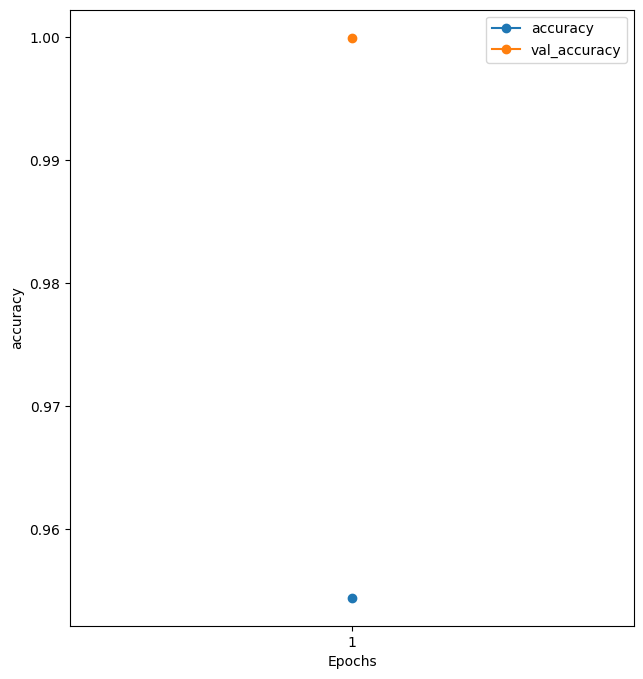

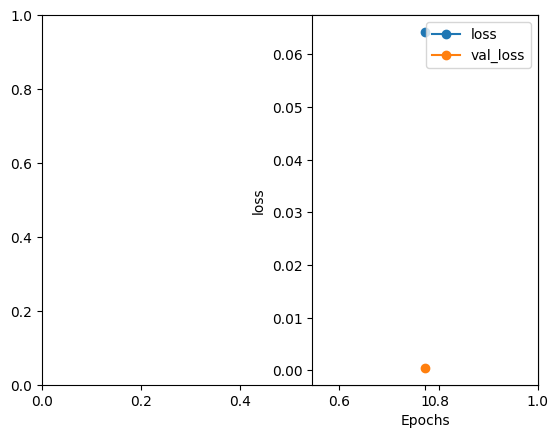

(0.0, 1.0)

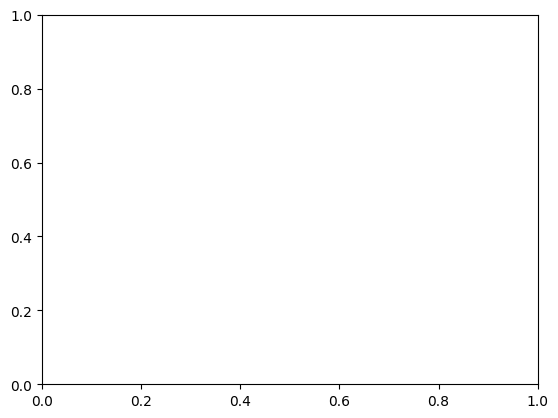

In [21]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plot_graphs(history, 'accuracy')
plt.ylim(None, 1)
plt.subplot(1, 2, 2)
plot_graphs(history, 'loss')
plt.ylim(0, None)

In [19]:
print(history.history.keys())
for k,v in history.history.items():
    print(k, len(v), v[:5])


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])
accuracy 1 [0.9544511437416077]
loss 1 [0.06424573808908463]
val_accuracy 1 [0.9999252557754517]
val_loss 1 [0.00046061151078902185]
